In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv(r'D:\data\competition\titanic\train.csv')
test = pd.read_csv(r'D:\data\competition\titanic\test.csv')

In [3]:
# 显示头5条数据，了解数据
# PassengerId指的是游客编号，次列对于预测生还没有意义，应删除
# Survived是标签列（0 or 1）
# Pclass指的是舱位等级，1表示高等舱，2表示中等舱，3表示低等舱
# Name指的是乘客的姓名，次列无法直接使用
# Age表示乘客的年龄，可通过统计数据进行进一步了解
# SibSp表示的是在船上的兄弟姐妹的数量
# Parch表示的是在船上的家长儿童的数量
# Ticket表示票号
# Fare表示船票价格
# Cabin表示船舱号
# Embarked表示的是登录的港口
print('训练集前五行为：')
train.head(5)

训练集前五行为：


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print('测试集前五行为：')
test.head(5)

测试集前五行为：


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#删除无关列
if 'PassengerId' in train.columns:
    train.drop(['PassengerId'], axis=1, inplace = True)
    
if 'PassengerId' in test.columns:
    test.drop(['PassengerId'], axis=1, inplace = True)

In [6]:
print('训练集的类型和数目为：')
train.info()
print('测试集的类型和数目为：')
test.info()

训练集的类型和数目为：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB
测试集的类型和数目为：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), objec

In [7]:
print('训练集的统计信息为：')
train.describe()

训练集的统计信息为：


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
print('测试集的统计信息为：')
test.describe()

测试集的统计信息为：


,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


# 对比训练集和测试集中各个特征的分布情况

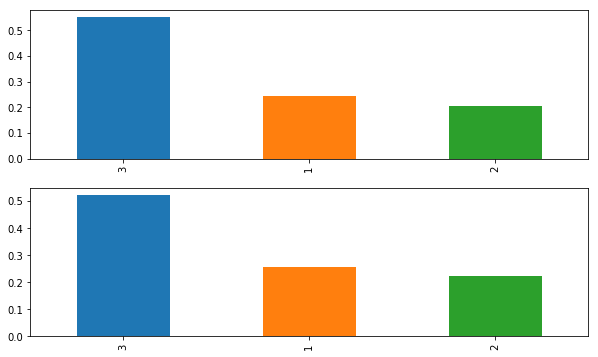

In [9]:
#对舱位等级的分布进行可视化
sns.set_context({"figure.figsize": (10, 6)}) #设置画布大小
fig = plt.figure()
ax1 = fig.add_subplot(211)
train['Pclass'].value_counts(normalize = True).plot(kind = 'bar', ax = ax1)
ax2 = fig.add_subplot(212)
test['Pclass'].value_counts(normalize = True).plot(kind = 'bar', ax = ax2)

#可见舱位等级分布几乎相同，低等舱位的人最多，其次为高等舱，最终为低等舱

In [10]:
print('训练集样本中的名字次数统计为：')
print(train['Name'].value_counts())
print('测试集样本中的名字次数统计为：')
print(test['Name'].value_counts())

#由于没有重复的名字，所以需要对名字进行处理

训练集样本中的名字次数统计为：
Dahl, Mr. Karl Edwart                                   1
Scanlan, Mr. James                                      1
Uruchurtu, Don. Manuel E                                1
Allen, Miss. Elisabeth Walton                           1
Graham, Miss. Margaret Edith                            1
Ford, Mr. William Neal                                  1
McGough, Mr. James Robert                               1
O'Sullivan, Miss. Bridget Mary                          1
Taylor, Mr. Elmer Zebley                                1
Skoog, Mrs. William (Anna Bernhardina Karlsson)         1
Trout, Mrs. William H (Jessie L)                        1
Charters, Mr. David                                     1
Cameron, Miss. Clear Annie                              1
O'Brien, Mrs. Thomas (Johanna "Hannah" Godfrey)         1
Willey, Mr. Edward                                      1
Ivanoff, Mr. Kanio                                      1
Nirva, Mr. Iisakki Antino Aijo                          

In [11]:
def process_name(name):
    prior_name = name
    
    bracket_pos = name.find(r'(')
    if  bracket_pos != -1:
        name = name[: bracket_pos]
        
    dot_pos = name.find(r'.')
    if dot_pos != -1:
        name = name[dot_pos+1: ]
        
    if len(name.strip()) == 0:
        prior_name = prior_name.strip()
        return prior_name.split(' ')[-1].strip(r'()').replace('"', '')
        
    return name.replace('"', '').strip()
    

In [12]:
train['Name'] = train['Name'].apply(process_name)
test['Name'] = test['Name'].apply(process_name)

In [13]:
print('修改后训练集样本中的名字次数统计为：')
print(train['Name'].value_counts())
print('修改后测试集样本中的名字次数统计为：')
print(test['Name'].value_counts())

#此处理不一定有效，还需要名字和survived进行关联查看

修改后训练集样本中的名字次数统计为：
William                      11
John                         10
James                         9
Mary                          7
Thomas                        5
Samuel                        5
Joseph                        5
William Henry                 4
William John                  4
George                        4
Martin                        4
Edward                        4
Ivan                          4
Bertha                        4
Emil                          3
Tannous                       3
Victor                        3
Patrick                       3
Harry                         3
Alfred                        3
David                         3
Benjamin                      3
Anna                          3
Alice                         3
Johan                         3
Anna Sofia                    3
Frederick                     3
Elizabeth                     3
Hanna                         2
Antoni                        2
                     

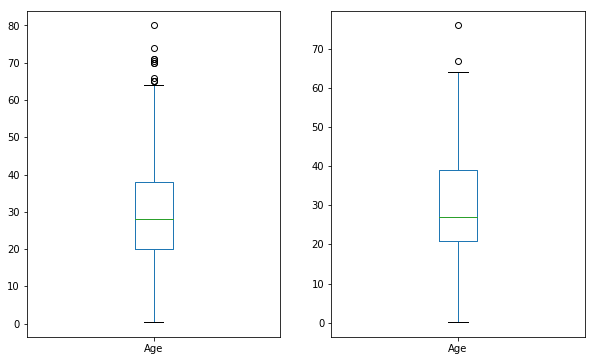

In [14]:
#对年龄的分布进行可视化
sns.set_context({"figure.figsize": (10, 6)}) #设置画布大小
fig = plt.figure()
ax1 = fig.add_subplot(121)
train['Age'].plot(kind = 'box', ax = ax1)
ax2 = fig.add_subplot(122)
test['Age'].plot(kind = 'box', ax = ax2)

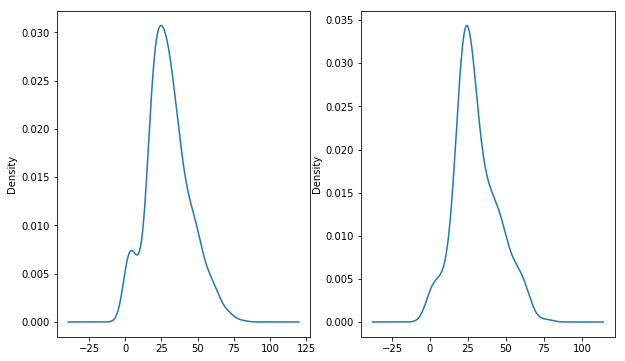

In [15]:
#对年龄的分布进行可视化
sns.set_context({"figure.figsize": (10, 6)}) #设置画布大小
fig = plt.figure()
ax1 = fig.add_subplot(121)
train['Age'].plot(kind = 'kde', ax = ax1)
ax2 = fig.add_subplot(122)
test['Age'].plot(kind = 'kde', ax = ax2)

#年龄的分布大体相同，但是在训练集中年龄大于65岁的人大约有10位，但在测试集中只有两位。

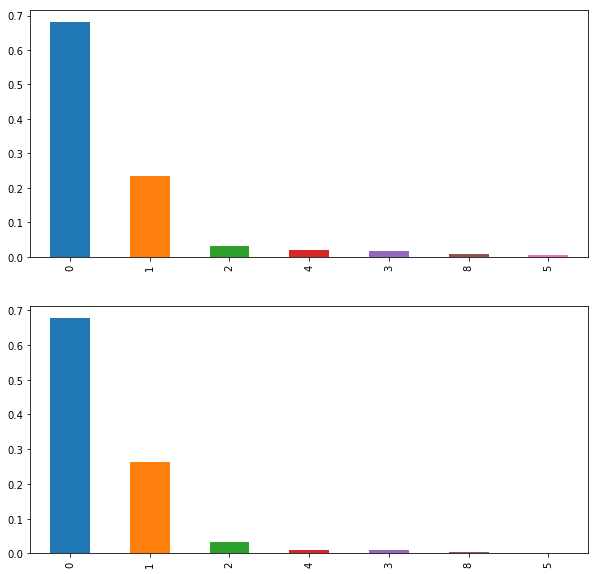

In [16]:
#对船上的兄弟姐妹个数的分布进行可视化
sns.set_context({"figure.figsize": (10, 10)}) #设置画布大小
fig = plt.figure()
ax1 = fig.add_subplot(211)
train['SibSp'].value_counts(normalize = True).plot(kind = 'bar', ax = ax1)
ax2 = fig.add_subplot(212)
test['SibSp'].value_counts(normalize = True).plot(kind = 'bar', ax = ax2)

#兄弟姐妹个数分布大体相同，而且船上兄弟姐妹的个数为0的频率最高，大于4的频率非常小

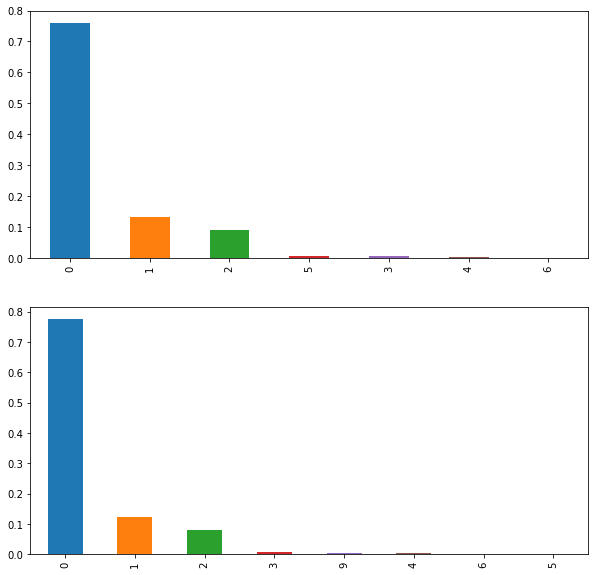

In [206]:
#对子女和父母个数的分布进行可视化
sns.set_context({"figure.figsize": (10, 10)}) #设置画布大小
fig = plt.figure()
ax1 = fig.add_subplot(211)
train['Parch'].value_counts(normalize = True).plot(kind = 'bar', ax = ax1)
ax2 = fig.add_subplot(212)
test['Parch'].value_counts(normalize = True).plot(kind = 'bar', ax = ax2)

#对子女和父母个数分布大体相同，数量为0的频率最高，大于4的频率非常小

In [18]:
print('训练集样本中的票号次数统计为：')
print(train['Ticket'].value_counts())
print('测试集样本中的票号次数统计为：')
print(test['Ticket'].value_counts())

#此处理不一定有效，还需要和survived进行关联查看

训练集样本中的票号次数统计为：
1601                 7
CA. 2343             7
347082               7
3101295              6
CA 2144              6
347088               6
S.O.C. 14879         5
382652               5
113781               4
349909               4
113760               4
4133                 4
17421                4
W./C. 6608           4
347077               4
LINE                 4
PC 17757             4
2666                 4
19950                4
PC 17760             3
248727               3
110152               3
24160                3
PC 17572             3
F.C.C. 13529         3
345773               3
PC 17755             3
SC/Paris 2123        3
13502                3
35273                3
                    ..
237789               1
367229               1
349241               1
111369               1
2631                 1
349224               1
349245               1
343095               1
349223               1
7553                 1
C 4001               1
SC/AH 29037       

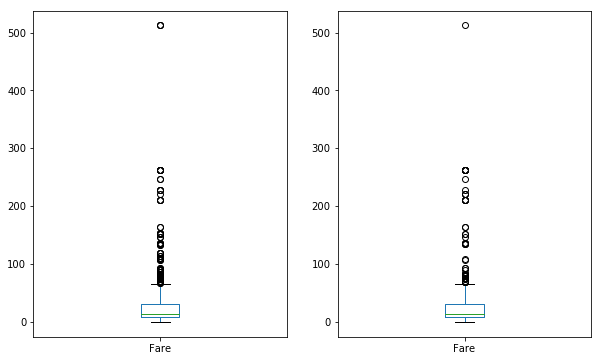

In [19]:
#对票价的分布进行可视化
sns.set_context({"figure.figsize": (10, 6)}) #设置画布大小
fig = plt.figure()
ax1 = fig.add_subplot(121)
train['Fare'].plot(kind = 'box', ax = ax1)
ax2 = fig.add_subplot(122)
test['Fare'].plot(kind = 'box', ax = ax2)

#根据boxplot可知票价分布大体相同

In [20]:
print('训练集样本中的船舱号次数统计为：')
print(train['Cabin'].value_counts())
print('测试集样本中的船舱号次数统计为：')
print(test['Cabin'].value_counts())

#此处理不一定有效，还需要和survived进行关联查看

训练集样本中的船舱号次数统计为：
G6             4
C23 C25 C27    4
B96 B98        4
C22 C26        3
D              3
E101           3
F33            3
F2             3
E33            2
C123           2
E121           2
D35            2
C2             2
D36            2
D20            2
C92            2
F G73          2
E44            2
C126           2
C68            2
C125           2
C93            2
B18            2
C65            2
B5             2
C124           2
E67            2
D33            2
B58 B60        2
B28            2
              ..
D28            1
E38            1
C32            1
B94            1
D48            1
E31            1
D21            1
D9             1
E50            1
C30            1
B86            1
A5             1
E63            1
D49            1
E10            1
B102           1
C82            1
B38            1
C148           1
E77            1
B39            1
E40            1
A20            1
C99            1
F G63          1
A32            1
C62 C64       

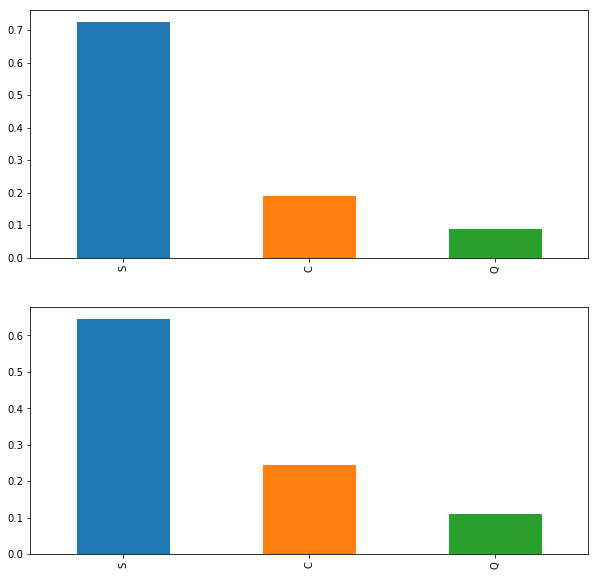

In [21]:
#对登录港口的分布进行可视化
sns.set_context({"figure.figsize": (10, 10)}) #设置画布大小
fig = plt.figure()
ax1 = fig.add_subplot(211)
train['Embarked'].value_counts(normalize = True).plot(kind = 'bar', ax = ax1)
ax2 = fig.add_subplot(212)
test['Embarked'].value_counts(normalize = True).plot(kind = 'bar', ax = ax2)

#根据barplot和boxplot可知登录港口分布大体相同

### 根据上述观察，各个特征的分布大体相同，所以使用训练集加机器学习算法来预测测试集的结果

# 单特征在不同标签下的数据分布

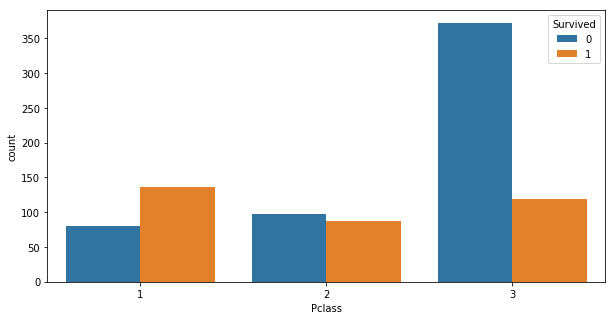

In [22]:
# 舱位等级和生还的关系
sns.set_context({"figure.figsize": (10, 5)})
sns.countplot(data = train, x = 'Pclass', hue = 'Survived')

#结论：有钱可以为所欲为

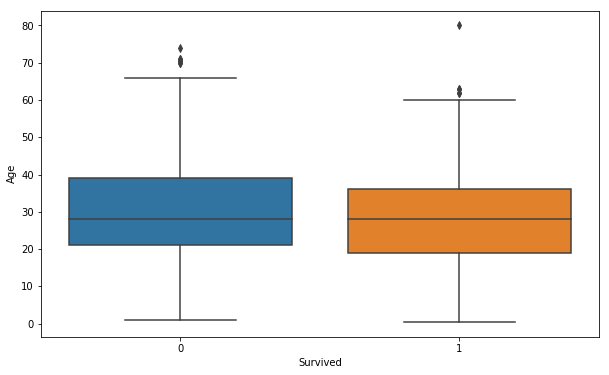

In [23]:
# 舱位等级和生还的关系
sns.set_context({"figure.figsize": (10, 6)})
sns.boxplot(data = train, x = 'Survived', y = 'Age')

#年龄特别大的生还，遇难的人中20~30的年轻人比较多（遇难者的中位数处于盒子的下方）。

In [24]:
train[['Name','Survived']].groupby('Name')['Survived'].value_counts()

Name                         Survived
Abraham                      0           1
Achille                      0           1
Adele Kiamie Jane            1           1
Adola                        0           1
Adolf Mathias Nicolai Olsen  0           1
Adolphe                      1           1
Agda Thorilda Viktoria       0           1
Agnes                        1           1
Ahmed                        0           1
Albert                       0           2
Albert A                     0           1
Albert Adrian                1           2
Albert Francis               1           1
Albert Johan                 1           1
Albina                       1           1
Alden Gates                  1           1
Alexander                    0           2
Alexander A                  0           1
Alexander Oskar              0           1
                             1           1
Alfons                       0           1
Alfonzo                      0           1
Alfred          

d:\ProgramData\Anaconda2\envs\python3.6\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


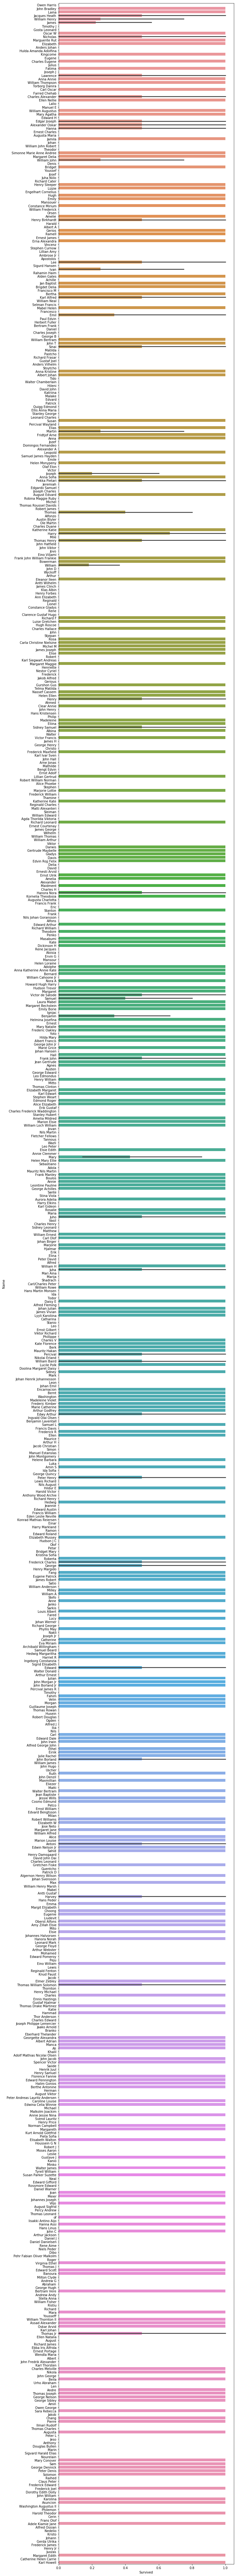

In [25]:
#  画图绘制转换后的姓名的生存和死亡的分布
sns.set_context({"figure.figsize": (10, 150)})
sns.barplot(data = train, x = 'Survived', y = 'Name', orient='h')

#下一步可以考虑把同名而且人数大于等于2的名字中都生还的转换为一个名字，都死亡的转换成一个名
# 其他的为另外一个值

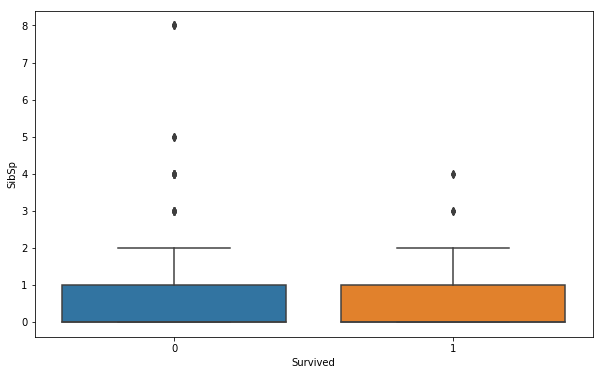

In [26]:
# 兄弟姐妹和生还的关系
sns.set_context({"figure.figsize": (10, 6)})
sns.boxplot(data = train, x = 'Survived', y = 'SibSp')

# 兄弟姐妹特别多的人都死了

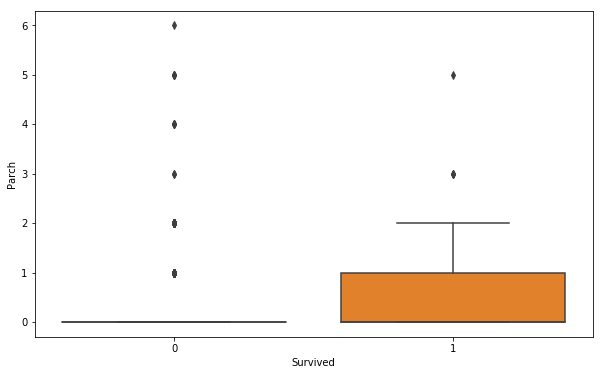

In [27]:
# 子女父母和生还的关系
sns.set_context({"figure.figsize": (10, 6)})
sns.boxplot(data = train, x = 'Survived', y = 'Parch')

# 特别多的都死了

d:\ProgramData\Anaconda2\envs\python3.6\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


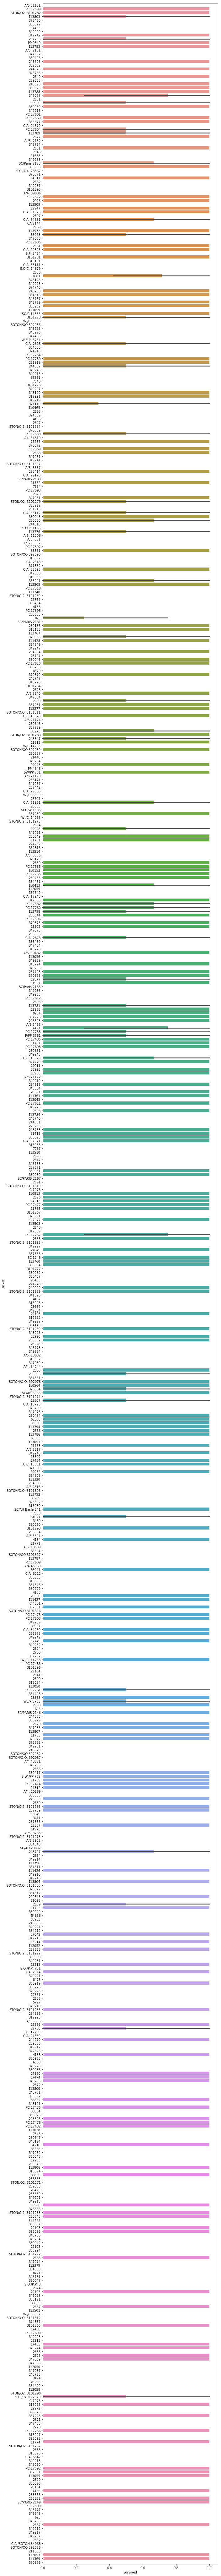

In [51]:
#  画图绘制票号的生存和死亡的分布
sns.set_context({"figure.figsize": (10, 150)})
sns.barplot(data = train, x = 'Survived', y = 'Ticket', orient='h')

# 可以考虑使用和姓名相同的处理方式

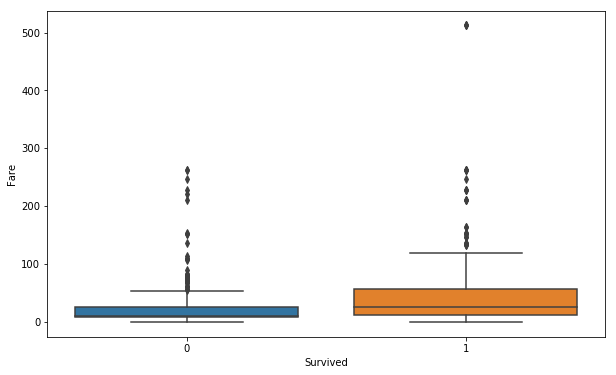

In [133]:
# 票价和生还的关系
sns.set_context({"figure.figsize": (10, 6)})
sns.boxplot(data = train, x = 'Survived', y = 'Fare')

# 特别有钱的生还了

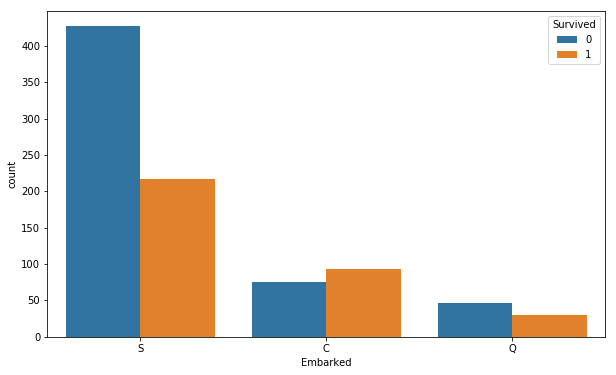

In [97]:
# 登船港口和生还的关系
sns.set_context({"figure.figsize": (10, 6)})
sns.countplot(x = 'Embarked', hue = 'Survived', data = train)

# 特别有钱的生还了

# 处理缺失值

In [16]:
print('训练集的类型和数目为：')
train.info()
print('测试集的类型和数目为：')
test.info()

训练集的类型和数目为：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB
测试集的类型和数目为：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), objec

In [17]:
#Cabin的缺失比例比较大，所以直接删除
if 'Cabin' in train.columns:
    train.drop(['Cabin'], axis=1, inplace = True)
    
if 'Cabin' in test.columns:
    test.drop(['Cabin'], axis=1, inplace = True)

In [18]:
# 在训练集中有两个Embarked的缺失值，根据Pclass相同，且距离最近的Fare小于1的进行投票选择进行填充
# Embarked相同的取中位数进行填充

if len(train.loc[train['Embarked'].isnull()]) >= 1:
    len_train_embarked_null = len(train.loc[train['Embarked'].isnull()])
    fare_fill_value_list = []
    
    for i in range(0, len_train_embarked_null):
        train_embared_null = train.loc[train['Embarked'].isnull()].iloc[i, :]
        train_embared_null_pclass = train_embared_null['Pclass']
        train_embared_null_fare = train_embared_null['Fare']
        
        #此步骤是因为包括nan，所有需要对nan进行drop
        fare_near_value = train.loc[(train['Pclass'] == train_embared_null_pclass) & \
                                                    (np.abs(train['Fare'] - train_embared_null_fare) < 1 \
                                                    )]['Embarked'].dropna()
        fare_fill_value = fare_near_value.mode().iloc[0]
        fare_fill_value_list.append(fare_fill_value)
         
    train.loc[train['Embarked'].isnull(), 'Embarked'] = fare_fill_value_list

In [19]:
# 在测试集中有一个Fare的缺失值，根据Pclass和Embarked相同的取中位数进行填充
if np.sum(test['Fare'].isnull()) > 0:
    fare_null_pclass = test.loc[test.Fare.isnull()][['Pclass']].values[0][0]
    fare_null_embarked = test.loc[test.Fare.isnull()][['Embarked']].values[0][0]
    #此步骤是因为包括nan，所有需要对nan进行drop
    fare_fill_value = test.loc[(test['Pclass'] == fare_null_pclass) & \
                                                    (test['Embarked'] == fare_null_embarked)]['Fare'].dropna()
    test['Fare'].fillna(np.median(fare_fill_value.values), inplace = True)


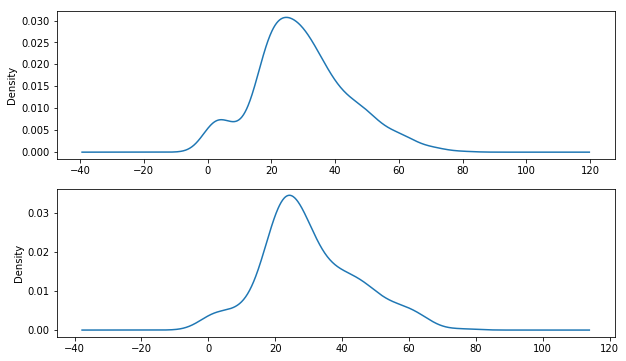

In [20]:
#对年龄填充前的分布进行可视化
sns.set_context({"figure.figsize": (10, 6)}) #设置画布大小
fig = plt.figure()
ax1 = fig.add_subplot(211)
train['Age'].plot(kind = 'kde', ax = ax1)
ax2 = fig.add_subplot(212)
test['Age'].plot(kind = 'kde', ax = ax2)

In [21]:
#对年龄使用中位数进行填充
if len(train.loc[train['Age'].isnull()]) > 1:
    train['Age'].fillna(train['Age'].median(), inplace = True)
    
if len(test.loc[test['Age'].isnull()]) > 1:
    test['Age'].fillna(test['Age'].median(), inplace = True)    

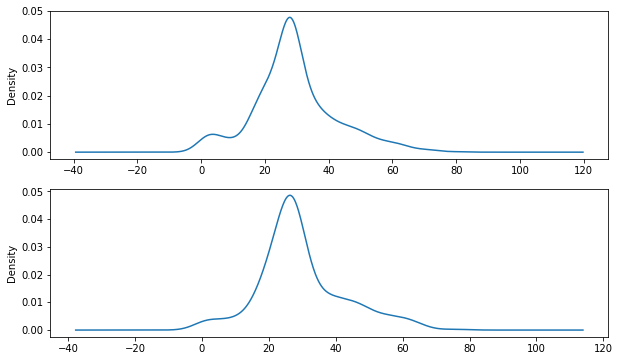

In [22]:
#对年龄填充后的分布进行可视化
sns.set_context({"figure.figsize": (10, 6)}) #设置画布大小
fig = plt.figure()
ax1 = fig.add_subplot(211)
train['Age'].plot(kind = 'kde', ax = ax1)
ax2 = fig.add_subplot(212)
test['Age'].plot(kind = 'kde', ax = ax2)

#填充后分布更加趋近，从某种程度上说明此操作有一定效果

In [23]:
print('填充缺失值后特征为：')
print('训练集的类型和数目为：')
train.info()
print('测试集的类型和数目为：')
test.info()

填充缺失值后特征为：
训练集的类型和数目为：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB
测试集的类型和数目为：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 29.5+ KB


# 通用特征工程

In [24]:
#添加一列特征，即为处理后的名字如果全为死亡（并且数目大于2）的标记为1，其他人标记为0

train_name = train.groupby(['Name'])['Survived'].value_counts().to_frame()
train_name.columns = ['Died']
train_name.reset_index(inplace = True)
train_name['Sum'] = train_name['Survived'] + train_name['Died']

train['Died_Status'] = 0
train_name_meaningful = train_name.loc[(train_name['Survived'] >= 2) | (train_name['Died'] >= 2)]
train_name_meaningful = train_name_meaningful.loc[(train_name_meaningful['Survived'] == train_name_meaningful['Sum']) | 
                                                  (train_name_meaningful['Died'] == train_name_meaningful['Sum'])]
all_lost_name = train_name_meaningful['Name'].values
train.loc[train['Name'].isin(all_lost_name), 'Died_Status'] = 1

test['Died_Status'] = 0
test.loc[train['Name'].isin(all_lost_name), 'Died_Status'] = 1


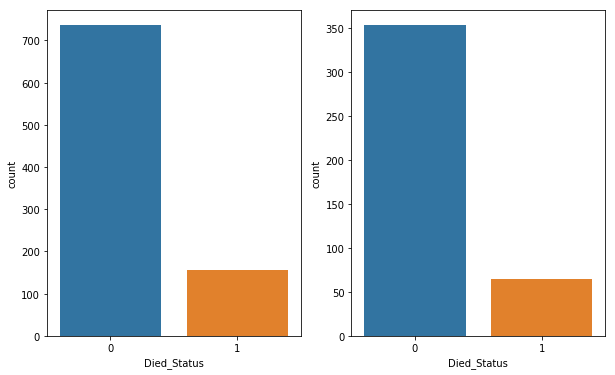

In [25]:
# 根据观察，可见该特征可能有效
sns.set_context({"figure.figsize": (10, 6)}) #设置画布大小
fig = plt.figure()
ax1 = fig.add_subplot(121)
sns.countplot(data=train, x = 'Died_Status', ax = ax1)
ax2 = fig.add_subplot(122)
sns.countplot(data=test, x = 'Died_Status', ax = ax2)

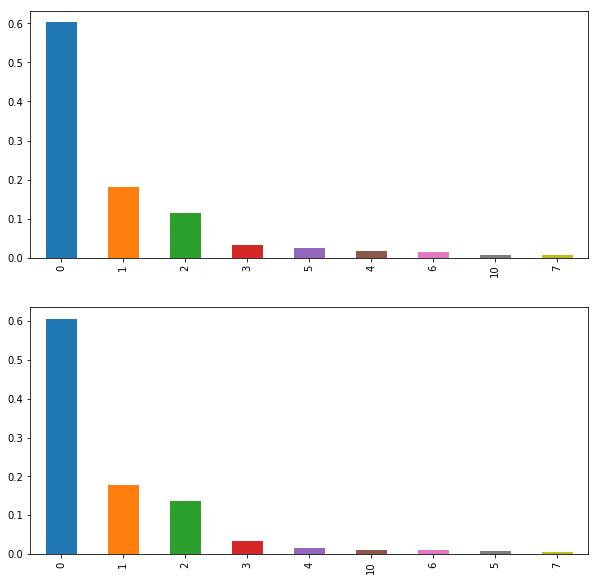

In [26]:
#添加一列特征为家庭成员个数，为SibSp和Parch之和
train["FamilySize"] = train["SibSp"] + train["Parch"]
test["FamilySize"] = test["SibSp"] + test["Parch"] 
#对家庭成员个数的分布进行可视化
sns.set_context({"figure.figsize": (10, 10)}) #设置画布大小
fig = plt.figure()
ax1 = fig.add_subplot(211)
train['FamilySize'].value_counts(normalize = True).plot(kind = 'bar', ax = ax1)
ax2 = fig.add_subplot(212)
test['FamilySize'].value_counts(normalize = True).plot(kind = 'bar', ax = ax2)

# 根据观察，1和2两者相同，后面特别大的值略有影响，根据数据可知，家庭成员特别大的应该死了，所以此特征有效

In [27]:
train_label = train['Survived']
train.drop(['Survived', 'Name'], axis = 1, inplace= True)
test.drop(['Name'], axis = 1, inplace= True)

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
Died_Status    891 non-null int64
FamilySize     891 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


# 模型相关的特征工程和模型构建

In [29]:
# 针对线性模型，我们需要对部分变量进行哑变量处理，并删掉共线性的一个特征
train_linear_model = train.copy()

In [30]:
train_linear_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
Died_Status    891 non-null int64
FamilySize     891 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [31]:
if 'Pclass' in train_linear_model.columns:
    train_linear_model['Pclass'] = train_linear_model['Pclass'].astype(str)
    train_linear_dummies = pd.get_dummies(train_linear_model[['Pclass', 'Sex', 'Embarked']], \
                                          prefix = 'key_', drop_first=True)
    
    train_linear_model = pd.concat([train_linear_model, train_linear_dummies], axis = 1)
    train_linear_model.drop(['Pclass', 'Sex', 'Embarked', 'Ticket'], inplace=True, axis = 1)

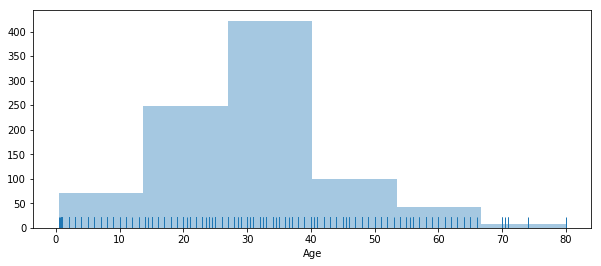

In [52]:
#在线性模型中，需要对Age和Fare进行离散化处理

sns.set_context({"figure.figsize": (10, 4)}) #设置画布大小
sns.distplot(train['Age'], kde=False, bins=6, rug=True)

In [114]:
from sklearn.preprocessing import KBinsDiscretizer

if 'Age' in train_linear_model.columns:
    train_age = train_linear_model['Age'].values.reshape(-1, 1)
    discrete = KBinsDiscretizer(n_bins=6, encode='onehot', strategy='quantile')
    discrete.fit(train_age)
    #可在此对测试集进行transform

    train_age = discrete.transform(train_age).toarray()
    df_train_age = pd.DataFrame(train_age).iloc[:, :-1]
    df_train_age.columns = ['Age_1', 'Age_2', 'Age_3', 'Age_4', 'Age_5']
    
    train_linear_model = pd.concat([train_linear_model, df_train_age], axis = 1)
    train_linear_model.drop(['Age'], inplace=True, axis = 1)
    
train_linear_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
SibSp          891 non-null int64
Parch          891 non-null int64
Died_Status    891 non-null int64
FamilySize     891 non-null int64
key__2         891 non-null uint8
key__3         891 non-null uint8
key__male      891 non-null uint8
key__Q         891 non-null uint8
key__S         891 non-null uint8
Age_1          891 non-null float64
Age_2          891 non-null float64
Age_3          891 non-null float64
Age_4          891 non-null float64
Age_5          891 non-null float64
Fare_1         891 non-null float64
Fare_2         891 non-null float64
Fare_3         891 non-null float64
Fare_4         891 non-null float64
Fare_5         891 non-null float64
dtypes: float64(10), int64(4), uint8(5)
memory usage: 101.9 KB


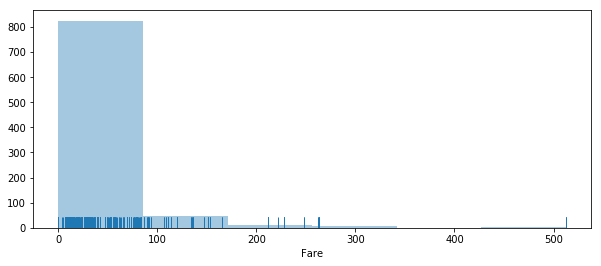

In [115]:
#在线性模型中，需要对Fare进行离散化处理

sns.set_context({"figure.figsize": (10, 4)}) #设置画布大小
sns.distplot(train['Fare'], kde=False, bins=6, rug=True)
#在线性模型中，需要对Age和Fare进行离散化处理

In [116]:
from sklearn.preprocessing import KBinsDiscretizer

if 'Fare' in train_linear_model.columns:
    train_fare = train_linear_model['Fare'].values.reshape(-1, 1)
    discrete = KBinsDiscretizer(n_bins=6, encode='onehot', strategy='quantile')
    discrete.fit(train_fare)
    #可在此对测试集进行transform

    train_fare = discrete.transform(train_fare).toarray()
    df_train_fare = pd.DataFrame(train_fare).iloc[:, :-1]
    df_train_fare.columns = ['Fare_1', 'Fare_2', 'Fare_3', 'Fare_4', 'Fare_5']
    
    train_linear_model = pd.concat([train_linear_model, df_train_fare], axis = 1)
    train_linear_model.drop(['Fare'], inplace=True, axis = 1)
    
train_linear_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
SibSp          891 non-null int64
Parch          891 non-null int64
Died_Status    891 non-null int64
FamilySize     891 non-null int64
key__2         891 non-null uint8
key__3         891 non-null uint8
key__male      891 non-null uint8
key__Q         891 non-null uint8
key__S         891 non-null uint8
Age_1          891 non-null float64
Age_2          891 non-null float64
Age_3          891 non-null float64
Age_4          891 non-null float64
Age_5          891 non-null float64
Fare_1         891 non-null float64
Fare_2         891 non-null float64
Fare_3         891 non-null float64
Fare_4         891 non-null float64
Fare_5         891 non-null float64
dtypes: float64(10), int64(4), uint8(5)
memory usage: 101.9 KB


In [117]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(train_linear_model, train_label)
logistic.score(train_linear_model, train_label)

d:\ProgramData\Anaconda2\envs\python3.6\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8271604938271605

In [127]:
# 针对距离模型，我们需要对部分变量进行哑变量处理
train_distance_model = train.copy()

if 'Pclass' in train_distance_model.columns:
    train_distance_model['Pclass'] = train_distance_model['Pclass'].astype(str)
    train_linear_dummies = pd.get_dummies(train_distance_model[['Pclass', 'Sex', 'Embarked']], \
                                          prefix = 'key_')
    
    train_distance_model = pd.concat([train_distance_model, train_linear_dummies], axis = 1)
    train_distance_model.drop(['Pclass', 'Sex', 'Embarked', 'Ticket'], inplace=True, axis = 1)
    
if 'Age' in train_distance_model.columns:
    train_age = train_distance_model['Age'].values.reshape(-1, 1)
    discrete = KBinsDiscretizer(n_bins=6, encode='onehot', strategy='quantile')
    discrete.fit(train_age)
    #可在此对测试集进行transform

    train_age = discrete.transform(train_age).toarray()
    df_train_age = pd.DataFrame(train_age)
    df_train_age.columns = ['Age_1', 'Age_2', 'Age_3', 'Age_4', 'Age_5', 'Age_6']
    
    train_distance_model = pd.concat([train_distance_model, df_train_age], axis = 1)
    train_distance_model.drop(['Age'], inplace=True, axis = 1)
    
if 'Fare' in train_distance_model.columns:
    train_fare = train_distance_model['Fare'].values.reshape(-1, 1)
    discrete = KBinsDiscretizer(n_bins=6, encode='onehot', strategy='quantile')
    discrete.fit(train_fare)
    #可在此对测试集进行transform

    train_fare = discrete.transform(train_fare).toarray()
    df_train_fare = pd.DataFrame(train_fare)
    df_train_fare.columns = ['Fare_1', 'Fare_2', 'Fare_3', 'Fare_4', 'Fare_5', 'Fare_6']
    
    train_distance_model = pd.concat([train_distance_model, df_train_fare], axis = 1)
    train_distance_model.drop(['Fare'], inplace=True, axis = 1)

In [128]:
# SVM不调参的结果
from sklearn.svm import SVC 
svm = SVC()
svm.fit(train_distance_model, train_label)
svm.score(train_distance_model, train_label)

d:\ProgramData\Anaconda2\envs\python3.6\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8103254769921436

In [135]:
# 针对树模型，对特征直接进行数字化即可
train_tree_model = train.copy()
from sklearn.preprocessing import OrdinalEncoder

if 'Pclass' in train_tree_model.columns:
    ordinal_encoder = OrdinalEncoder()
    ordinal_encoder.fit(train_tree_model[['Sex', 'Embarked']])
    tree_numberic = ordinal_encoder.transform(train_tree_model[['Sex', 'Embarked']])
    train_tree_model[['Sex', 'Embarked']] = tree_numberic
    train_tree_model.drop(['Ticket'], inplace=True, axis = 1)
train_tree_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Pclass         891 non-null int64
Sex            891 non-null float64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null float64
Died_Status    891 non-null int64
FamilySize     891 non-null int64
dtypes: float64(4), int64(5)
memory usage: 62.7 KB


In [136]:
# 决策树不调参的结果
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_tree_model, train_label)
decision_tree.score(train_tree_model, train_label)

0.9820426487093153

## 结果显示

In [144]:
from sklearn.model_selection import cross_val_score
print('逻辑回归的结果是：', cross_val_score(logistic, train_linear_model, train_label))
print('SVM的结果是：', cross_val_score(svm, train_linear_model, train_label))
print('决策树的结果是：', cross_val_score(svm, train_linear_model, train_label))

逻辑回归的结果是： [0.78451178 0.82491582 0.82154882]
SVM的结果是： [0.8047138  0.82828283 0.8013468 ]
决策树的结果是： [0.8047138  0.82828283 0.8013468 ]


d:\ProgramData\Anaconda2\envs\python3.6\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
d:\ProgramData\Anaconda2\envs\python3.6\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\ProgramData\Anaconda2\envs\python3.6\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\ProgramData\Anaconda2\envs\python3.6\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\ProgramData\Anaconda2\envs\python3.6\lib\s